In [1]:
# importing
import plotly
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import chart_studio

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

chart_studio.tools.set_credentials_file(username='shhreyaa',                                              
                                  api_key='UGJfLKcZ6nznR80PcPL8')

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:


df = pd.read_excel("sales_11.xlsx")


df.info()
df1= df
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order Date    9994 non-null   datetime64[ns]
 2   Customer ID   9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   Product ID    9994 non-null   object        
 5   Category      9994 non-null   object        
 6   Sub-Category  9994 non-null   object        
 7   Product Name  9994 non-null   object        
 8   Sales         9994 non-null   float64       
 9   Quantity      9994 non-null   int64         
 10  Discount      9994 non-null   float64       
 11  Profit        9994 non-null   float64       
 12  month         9994 non-null   object        
 13  year          9994 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 1.1+ MB


,Row ID,Order Date,Customer ID,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year
0,1,2016-11-08,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,31435.20,2,0.00,5029.632,Nov,2016
1,2,2016-11-08,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",87832.80,3,0.00,26349.840,Nov,2016
2,3,2016-06-12,DV-13045,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1754.40,2,0.00,824.568,Jun,2016
3,4,2015-10-11,SO-20335,Consumer,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,114909.30,5,0.45,-45963.720,Oct,2015
4,5,2015-10-11,SO-20335,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2684.16,2,0.20,301.968,Oct,2015
5,6,2014-06-09,BH-11710,Consumer,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,5863.20,7,0.00,1700.328,Jun,2014
6,7,2014-06-09,BH-11710,Consumer,OFF-AR-10002833,Office Supplies,Art,Newell 322,873.60,4,0.00,235.872,Jun,2014
7,8,2014-06-09,BH-11710,Consumer,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,108858.24,6,0.20,10885.824,Jun,2014
8,9,2014-06-09,BH-11710,Consumer,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,2220.48,3,0.20,693.900,Jun,2014
9,10,2014-06-09,BH-11710,Consumer,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,13788.00,5,0.00,4136.400,Jun,2014


In [3]:
#sales and profit of total sales
df = pd.read_excel("sales_11.xlsx")


# cols = ['Row ID','Customer ID', 'Segment','Category', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount']
# df1.drop(cols, axis=1, inplace=True)
factors = ['Sales','Profit']


df1 = df1.sort_values('Order Date')
df1.isnull().sum()

trace_list = []

df1= df.set_index('Order Date').resample('MS').sum()
length = 2
colors=[]

for y in range(length):

    trace = go.Scatter(
        y=df1[factors[y]],
        x=df1.index,
        mode='lines',
        name=factors[y],

        line = dict(
#                     color = colors[y],
                    width = 2,
#                    dash = 'dot'
                    )
        )
    trace_list.append(trace)
layout = go.Layout(
    xaxis=dict(title='Year from 2014 to 2018', zeroline=False, rangeslider=dict(visible=True)),
    yaxis=dict(title='Sales', zeroline=False),

    title='Sales vs Profit',
    showlegend=True,
    )
fig = go.Figure(data=trace_list, layout=layout)
py.iplot(fig,sharing='public')



In [4]:
def profit(prof):
      x= prof
      prof = df.loc[df['Category'] == "{}".format(prof)]
    
    
      cols = ['Row ID','Sales','Customer ID', 'Segment','Product ID', 'Category','Sub-Category', 'Product Name', 'Quantity', 'Discount']
      prof.drop(cols, axis=1, inplace=True)
      prof = prof.sort_values('Order Date')
      prof.isnull().sum()
      prof = prof.set_index('Order Date')

      y_fur = prof['Profit'].resample('MS').sum()
      y_fur.plot(figsize=(15, 6))
      plt.plot()
      plt.xlabel('Time')
      plt.ylabel('Profit in Rs')
      plt.legend(["{}".format(x)])
 

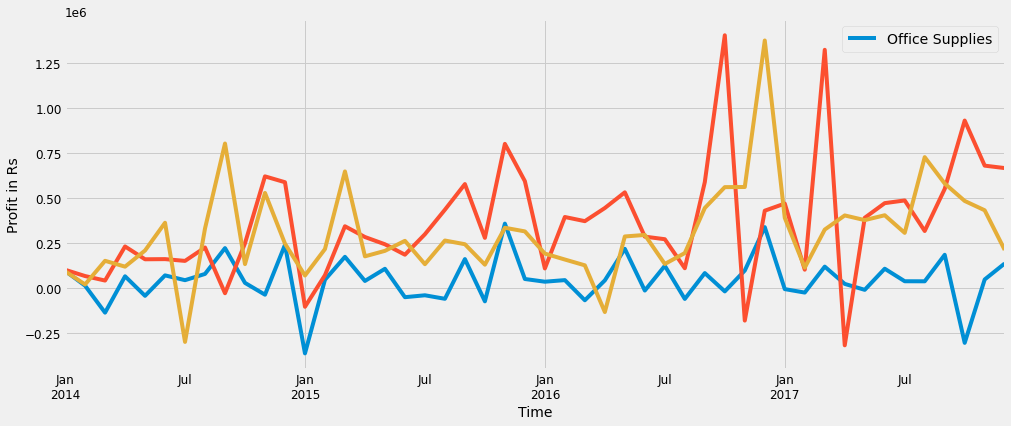

In [5]:
#fix individual legend in everything as of now it shows only office supplies
profit('Furniture')

profit('Technology')
profit('Office Supplies')

In [6]:
#show sales 
def sales(sale_category):
     x= sale_category
     sale_categories = df.loc[df['Category'] == "{}".format(sale_category)]
     cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
     sale_categories.drop(cols, axis=1, inplace=True)
     sale_categories=pd.to_datetime(sale_categories['Order Date'])
     
     sale_categories = sale_category.sort_values(by=['Order Date'])
     
     sale_categories.isnull().sum()
     sale_categories= sale_category.groupby('Order Date')['Sales'].sum().reset_index()
     sale_categories = sale_category.set_index('Order Date')
     
     trace_cat = go.Scatter(
          y = sale_categories['Sales'].resample('MS').sum(),
          x= sale_categories.index,
          mode='lines',
          
          line = dict(
#                     color = colors[y],
                    width = 2,
                   dash = 'dot'
                    )
          )
     

    
     layout = go.Layout(
        xaxis=dict(title='Year from 2014 to 2018', zeroline=False, rangeslider=dict(visible=True)),
        yaxis=dict(title='Sales', zeroline=False),

        title='Sales vs Profit',
        showlegend=True,
      )
     fig = go.Figure(data=trace_cat, layout=layout)
     py.iplot(fig,sharing='public')
     x= sale_category
     y = sale_categories['Sales'].resample('MS').sum()

     decompose(y)
     predict(y)
     sale_category.head()
     
     
    

In [7]:
def decompose(y):
    from pylab import rcParams
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.show()

In [8]:
def predict(y):
    #I have no idea this step
# Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    warnings.filterwarnings("ignore") # specify to ignore warning messages

# #sarima model to find best AIC, lower the AIC better

#     for param in pdq:
#         for param_seasonal in seasonal_pdq:
#             try:
#                 mod = sm.tsa.statespace.SARIMAX(y,
#                                                 order=param,
#                                                 seasonal_order=param_seasonal,
#                                                 enforce_stationarity=False,
#                                                 enforce_invertibility=False)

#                 results = mod.fit()

#                 print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#             except:
#                 continue
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    # for the graph
    ax = y['2014':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.legend()
    plt.show()
        #fthere is a gap cause the monthly summary comes at the start of december, find a way to connect red and blue graph
    #can fix it with prophet but will not look so good
    pred_uc = results.get_forecast(steps=100)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.legend()
    plt.show()


In [9]:
sales("Furniture")



AttributeError: 'str' object has no attribute 'sort_values'

In [ ]:
sales("Technology")

In [ ]:
sales("Office Supplies")

In [ ]:
pwd

In [ ]:
df2=df

df2.head()
cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df2.drop(cols, axis=1, inplace=True)
df2 = df2.sort_values('Order Date')
df2.isnull().sum()
df2=df2.groupby('Order Date')['Sales'].sum().reset_index()
df2 = df2.set_index('Order Date')
y = df2['Sales'].resample('MS').sum()
  
y.plot(figsize=(15, 6))
plt.show()
decompose(y)
predict(y)
     